In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scattnlay import scattnlay, fieldnlay
import optool
import pandas as pd
import seaborn as sns
from functions import *

import time
OPTOOL_SETTINGS # print the dictionary that contains the current model settings

{'lmin': 0.1, 'lmax': 1000, 'nl': 100, 'method': 'mie', 'NANG': 180}

Here I create a simple BCCA particle!

In [14]:
p = Particle(
    D=1.9,            # dimension
    kf=1.03,           # fractal prefactor
    a0=0.01,          # monomer radius in micron
    Rc=1.0,           # characteristic radius in micron
    N=10,             # number of shells used for scattnlay calculation
    material="pyr-mg70 0.70 c 0.30", # optool interpetable material string
    matrix=True      # set True if you want scattering matrices
)
p.describe()

Fractal particle properties:
-----------------------------
Fractal dimension (D):      1.900
Fractal prefactor (kf):     1.030
Monomer radius (a0):        1.000e-02 micron
Monomer density (ρ_mono):   2.500e+00 g/cm³
Characteristic radius (Rc): 1.000e+00 micron
Radius of gyration (Rg):    7.746e-01 micron
Integration constant (C):   1.056e-14 g·micron⁻1.90
Mass:                       6.982e-14 g
Volume:                     4.189e+00 micron³
Mean density (ρ̄):           1.667e-02 g/cm³
Notes:                    
None
 


Now that we have created the particle, we run the calculation!

In [15]:
p.RunMie() #calls optool to run -mie and stores the results under .Optool_results

kappas_df, matrix_df, angles = p.Optool_results # returns kappas (and g), and matrix elements, lastly, it returns a list of angles used


We can now do the same for scattnlay!
Note that RunMie() has to be called before RunScatt()*

In [16]:
p.RunScatt()
kappas_df, matrix_df, angles = p.Scatt_results


And lastly, the MMF results

In [18]:
p.RunMMF()
kappas_df, matrix_df, angles = p.MMF_results

⚠ Optool warning: WARNING: opacities OK, but some F_nn,g_asym are set to zero. lam<=     0.110 Writing full scattering data to file: dustkapscatmat.dat


In [19]:
p.describe()

Fractal particle properties:
-----------------------------
Fractal dimension (D):      1.900
Fractal prefactor (kf):     1.030
Monomer radius (a0):        1.000e-02 micron
Monomer density (ρ_mono):   2.500e+00 g/cm³
Characteristic radius (Rc): 1.000e+00 micron
Radius of gyration (Rg):    7.746e-01 micron
Integration constant (C):   1.056e-14 g·micron⁻1.90
Mass:                       6.982e-14 g
Volume:                     4.189e+00 micron³
Mean density (ρ̄):           1.667e-02 g/cm³
Notes:                    
 


Now that we created a particle, we can save it to memory using

In [20]:
folder = save_particle(p, outdir="saved_particles", name="my_particle")

which stores the particle here: saved_particles/my_particle.


saving a particle creates up to 10 files:
- metadata.json 
        contains the settings used to create the particle. This file is always created

For each calculation used (MMF Mie or Scattnlay)
the results are stored
ex:
- mmf_kappas.csv
- mmf_matrix.csv
- mmf_angles.csv


Using the parent folder, we can recreate the particle without running the code again!


In [27]:
p2 = Particle.from_folder("saved_particles/my_particle")
p2.describe()


Fractal particle properties:
-----------------------------
Fractal dimension (D):      1.900
Fractal prefactor (kf):     1.030
Monomer radius (a0):        1.000e-02 micron
Monomer density (ρ_mono):   2.500e+00 g/cm³
Characteristic radius (Rc): 1.000e+00 micron
Radius of gyration (Rg):    7.746e-01 micron
Integration constant (C):   1.056e-14 g·micron⁻1.90
Mass:                       6.982e-14 g
Volume:                     4.189e+00 micron³
Mean density (ρ̄):           1.667e-02 g/cm³
Notes:                    
 


by default, the code adheres to the normalization used by Optool. 
but to change it, we can call the renormalize(p = myparticle, norm='b') function
where p is your particle containing the matrix results
and norm is either 'b' (Bohren and Huffman) or 'm' (Mischenko).

### plotting results
To plot results, you can either use the results files directly and create your own figures (if you want them in a specific shape)
or use the build in plot functions for some basic plots

In [28]:
p = Particle(
    D=3,            # dimension
    kf=0.3,           # fractal prefactor
    a0=0.01,          # monomer radius in micron
    Rc=1.0,           # characteristic radius in micron
    N=10,             # number of shells used for scattnlay calculation
    material="pyr-mg70 0.70 c 0.30", # optool interpetable material string
    matrix=True      # set True if you want scattering matrices
)
p.RunMie()
p.RunMMF(force= True) #forces calculations with -mmfss
p.RunScatt()
p.describe()

⚠ Optool warning: WARNING: We will use the assumption of single scattering to compute the MMF matrix elements when the phase shift is too large. See UserGuide. .................... ....................
⚠ Optool warning: WARNING: opacities OK, but some F_nn,g_asym may not be accurate. lam<=     0.933 Writing full scattering data to file: dustkapscatmat.dat
Fractal particle properties:
-----------------------------
Fractal dimension (D):      3.000
Fractal prefactor (kf):     0.300
Monomer radius (a0):        1.000e-02 micron
Monomer density (ρ_mono):   2.500e+00 g/cm³
Characteristic radius (Rc): 1.000e+00 micron
Radius of gyration (Rg):    7.746e-01 micron
Integration constant (C):   5.809e-13 g·micron⁻3.00
Mass:                       2.433e-12 g
Volume:                     4.189e+00 micron³
Mean density (ρ̄):           5.809e-01 g/cm³
Notes:                    
 


with plot_kappas(p) we can plot the kappas found inside the particle

(<Figure size 1000x700 with 2 Axes>,
 (<Axes: ylabel='$\\kappa$ (cm$^2$ g$^{-1}$)'>,
  <Axes: xlabel='Wavelength (Micron)', ylabel='Residual (%)'>))

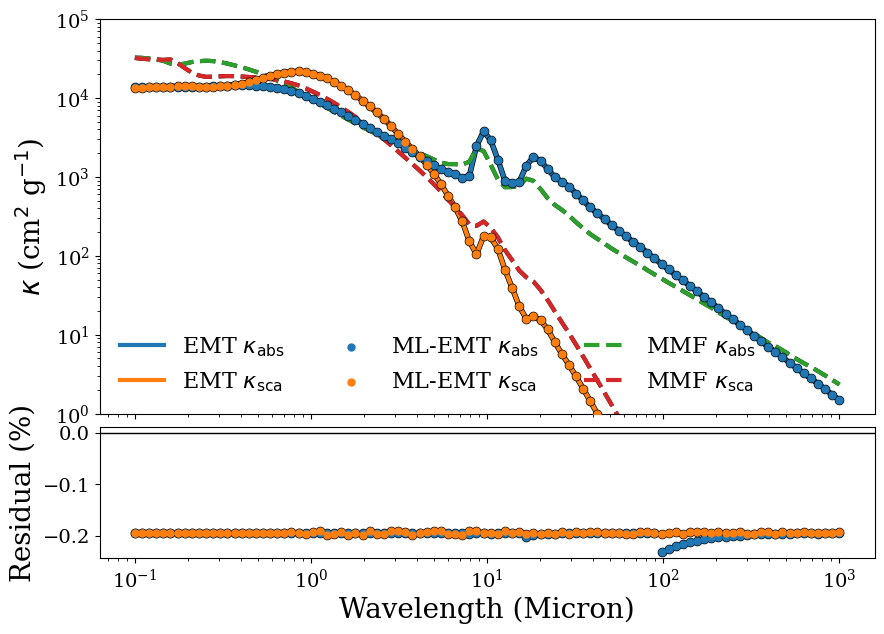

In [10]:
plot_kappas(p)

same for the asymmetry parameter g

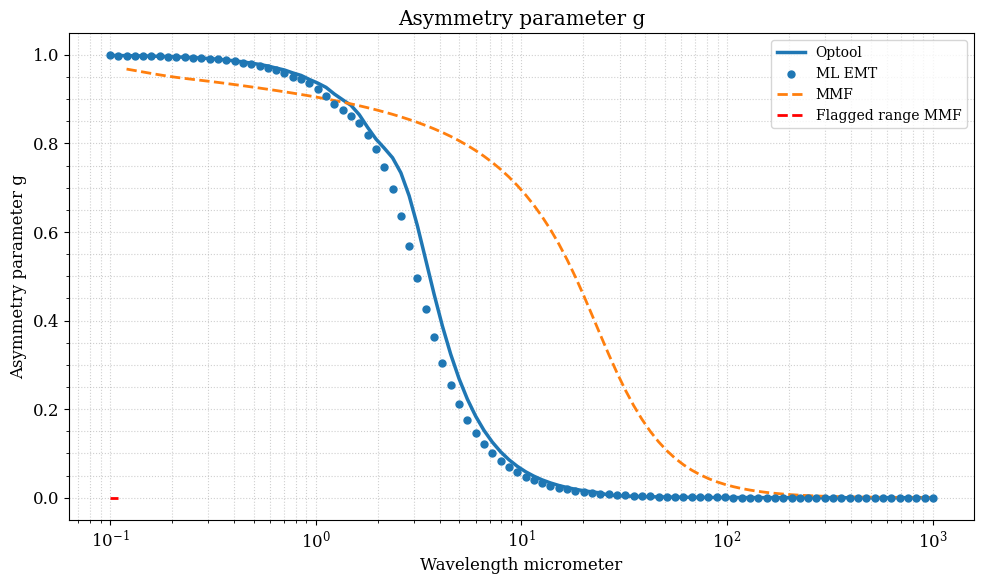

In [24]:
plot_g(p)

# now for Matrix elements at a given lambda

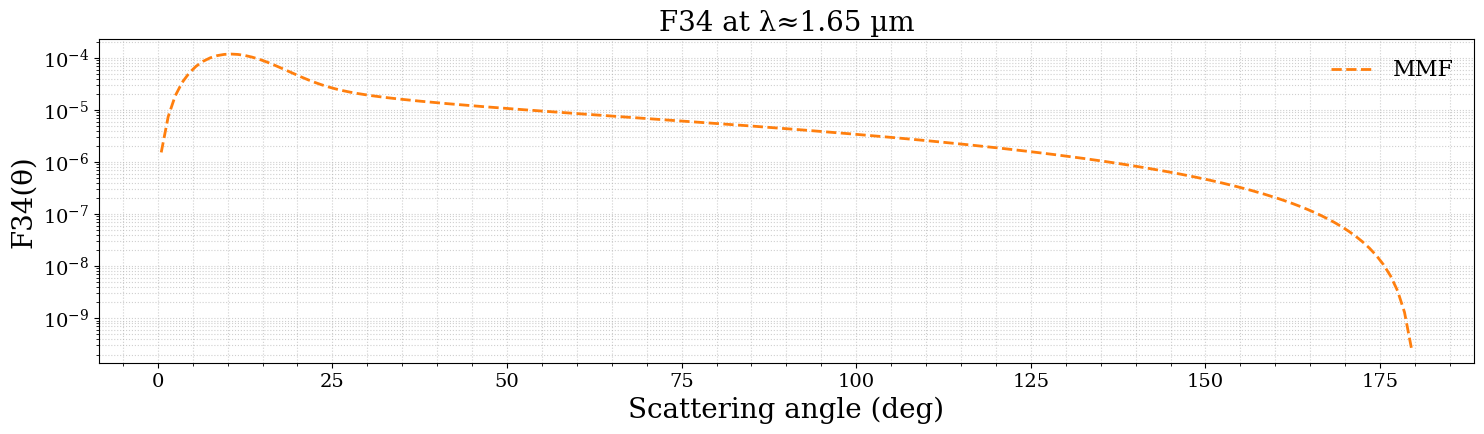

In [11]:
plot_matrix(p, 'F34', wavelength= 1.65, logy = True)

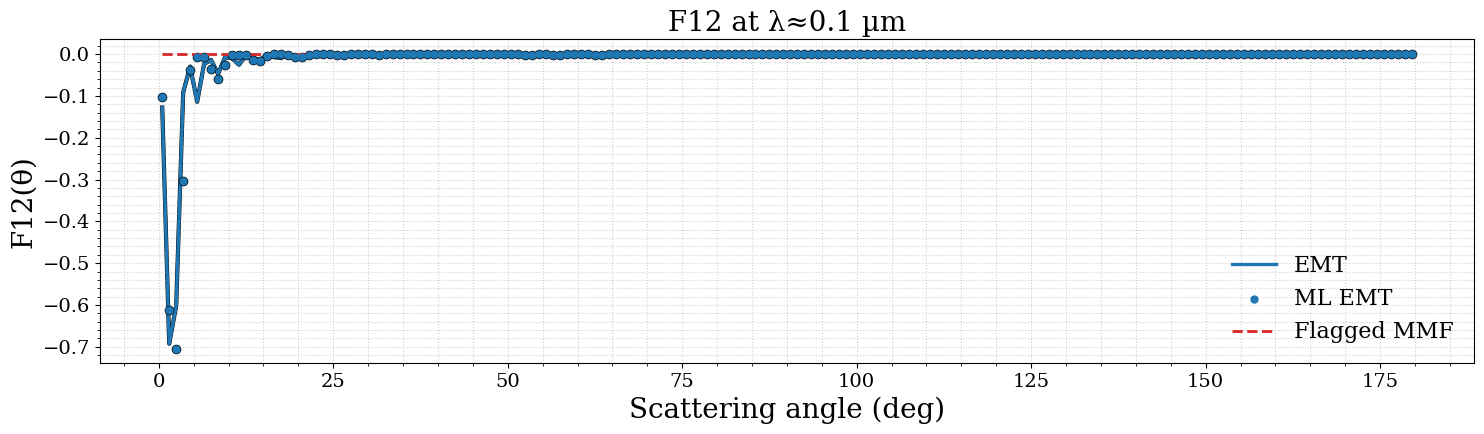

In [26]:
plot_matrix(p, 'F12', wavelength= .1, logy = True)

In [10]:
renormalize(p, 'h')

done
